In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Non_linear_SVM_Dataset.csv')

In [3]:
df.shape

(500, 3)

In [4]:
df.head()

,X1,X2,Y
0,0.830858,-0.334342,1.0
1,0.991710,0.879000,0.0
2,1.107245,-0.470344,1.0
3,-0.140899,1.033148,0.0
4,0.405592,1.328529,0.0


In [6]:
### missing values
df.isnull().sum()

X1    0
X2    0
Y     0
dtype: int64

In [7]:
#### duplicates
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='X1', ylabel='X2'>

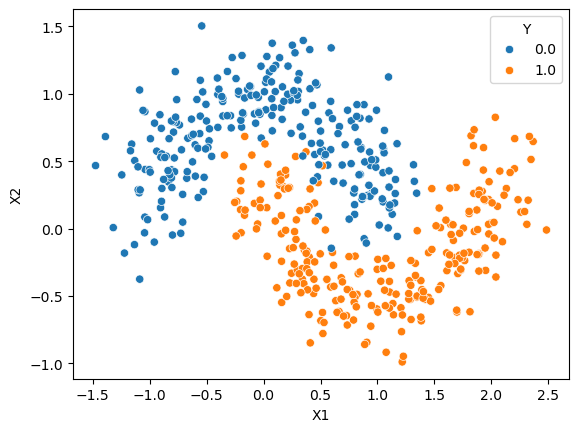

In [14]:
#plt.scatter(df.X1,df.X2,c=df.Y)
sns.scatterplot(x=df.X1,y=df.X2,hue=df.Y)

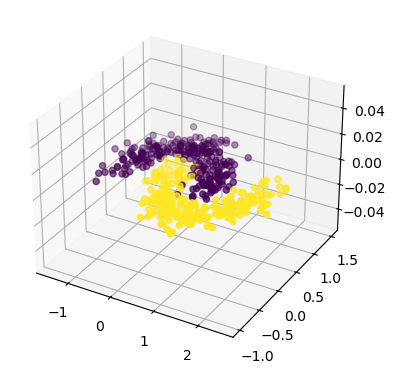

In [20]:
#### 3-D plot
fig= plt.figure(figsize=(10,10))
ax= fig.add_subplot(222,projection='3d')
ax.scatter(df.X1,df.X2,c=df.Y)

In [21]:
target= df[['Y']]
features= df.drop(columns=['Y'])

In [23]:
#### splitting train_test
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100,stratify=df.Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 2)
(125, 2)
(375, 1)
(125, 1)


In [28]:
#### Model Building and validation
svc=SVC(C=1,kernel='linear')
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
accuracy_score(y_test,y_pred)

0.824

In [45]:
x_min=df.X1.min()-1
x_max=df.X1.max()+1
y_min= df.X2.min()-1
y_max= df.X2.max()+1
print(x_min,x_max,y_min,y_max)

-2.4761269392401806 3.48480165010424 -1.9885260706545684 2.5042788037105517


In [46]:
## step interval
h=0.02

In [47]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [50]:
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [54]:
yy

array([[-1.98852607, -1.98852607, -1.98852607, ..., -1.98852607,
        -1.98852607, -1.98852607],
       [-1.96852607, -1.96852607, -1.96852607, ..., -1.96852607,
        -1.96852607, -1.96852607],
       [-1.94852607, -1.94852607, -1.94852607, ..., -1.94852607,
        -1.94852607, -1.94852607],
       ...,
       [ 2.45147393,  2.45147393,  2.45147393, ...,  2.45147393,
         2.45147393,  2.45147393],
       [ 2.47147393,  2.47147393,  2.47147393, ...,  2.47147393,
         2.47147393,  2.47147393],
       [ 2.49147393,  2.49147393,  2.49147393, ...,  2.49147393,
         2.49147393,  2.49147393]])